### ID посылки: 348994119


### Ссылка на github: https://github.com/jefrryss/Algorithms.git

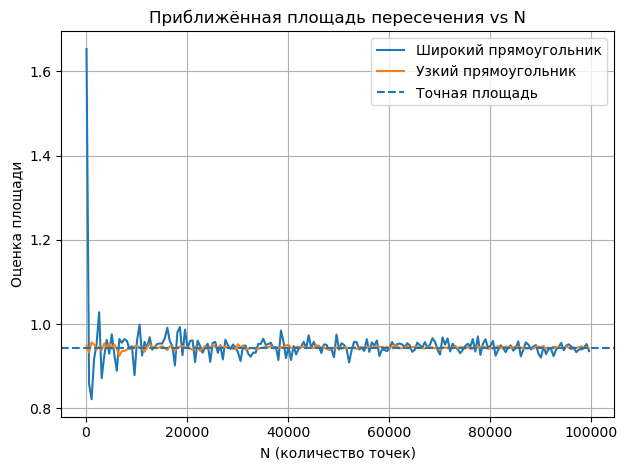

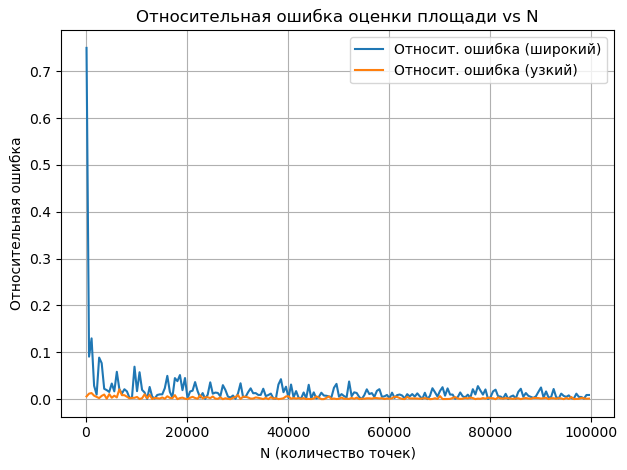

In [1]:
import csv
import math
import matplotlib.pyplot as plt

CSV_FILE = "./res.csv"

S_exact = 0.25 * math.pi + 1.25 * math.asin(0.8) - 1.0

N = []
S_wide = []
err_wide = []
S_narrow = []
err_narrow = []
with open(CSV_FILE, "r", encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=';')
    for row in reader:
        N.append(int(row["N"]))
        S_wide.append(float(row["S_wide"]))
        err_wide.append(float(row["err_wide"]))
        S_narrow.append(float(row["S_narrow"]))
        err_narrow.append(float(row["err_narrow"]))


plt.figure()
plt.plot(N, S_wide, label="Широкий прямоугольник")
plt.plot(N, S_narrow, label="Узкий прямоугольник")
plt.axhline(S_exact, linestyle="--", label="Точная площадь")

plt.xlabel("N (количество точек)")
plt.ylabel("Оценка площади")
plt.title("Приближённая площадь пересечения vs N")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("area_vs_N.png", dpi=200)


rel_wide = [e / S_exact for e in err_wide]
rel_narrow = [e / S_exact for e in err_narrow]

plt.figure()
plt.plot(N, rel_wide, label="Относит. ошибка (широкий)")
plt.plot(N, rel_narrow, label="Относит. ошибка (узкий)")

plt.xlabel("N (количество точек)")
plt.ylabel("Относительная ошибка")
plt.title("Относительная ошибка оценки площади vs N")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("rel_error_vs_N.png", dpi=200)

plt.show()


1. **Точность увеличивается при росте количества точек.**  
   Чем больше случайных точек используется в методе Монте-Карло, тем ближе результат к точному значению.

2. **Узкий прямоугольник даёт значительно меньшую ошибку.**  
   Из-за меньшего количества «пустого» пространства доля точек, попадающих в область пересечения, выше, что уменьшает случайные колебания результата.

3. **Широкий прямоугольник остаётся менее точным.**  
   Даже при большом числе точек оценка в широкой области даёт заметные колебания и более высокую ошибку.

4. **Для узкой области высокая точность достигается уже при 5–10 тысячах точек.**  
   Ошибка становится порядка 0.002 и продолжает уменьшаться при увеличении количества точек.

5. **Выбор области важнее, чем просто увеличение числа точек.**  
   Узкая область при том же количестве точек даёт точность в 5–10 раз выше, чем широкая. Это показывает, что геометрическая оптимизация области повышает эффективность метода.